# Setup
Pouquissimo preprocessamento necessario, apenas foi feito um drop no veil-type pois embora use 2 valores (u e p), a base de dados so apresenta ele com p, desnecessario entao retirado.

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("uciml/mushroom-classification")

mushrooms = pd.read_csv(path+'/mushrooms.csv')

Using Colab cache for faster access to the 'mushroom-classification' dataset.


In [2]:
X = mushrooms.drop(['class', 'veil-type'], axis=1) # seems to have only one veil type, lets drop it
y = mushrooms['class']

# Opcional: Algumas avaliacoes antes de realizar os testes

In [16]:
print(mushrooms.describe(include='all'))


# Quais os atributos mais importantes?
from sklearn.feature_selection import mutual_info_classif

mushcopy = mushrooms.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in mushcopy.columns:
    mushcopy[col] = le.fit_transform(mushcopy[col])
#mushcopy['class'] = mushrooms['class']

X=mushcopy.drop('class',axis=1)
y=mushrooms['class']

importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, index=X.columns)
print(feat_importances.sort_values(ascending=False).head(8)) # Aponta os mais atributos mais importantes que definem a classe final

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

# Escolha de um encoder
1. LabelEncoder

Ta funcionando bem com o RandomForest

2. OneHotEncoder

Funciona com a maioria


Escolha um e use com algum modelo


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [ ]:
X_encoded = pd.get_dummies(X)

# Separacao entre treino e testes

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.2, random_state=42)

# Escolha do modelo de treinamento
1. KNeighbors
2. RandomForest
3. Naive Bayes Gaussiano
4. MLP

Escolha um e rode o ultimo para fazer a previsao

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=150,       # trees
    max_depth=None,         # allow trees to grow until leaves are pure
    random_state=42
)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [6]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrificando o teste e avaliando a acuracia e o modelo

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}") # 80%
print(classification_report(y_test, y_pred, target_names=["edible","poisonous"])) # target_names=y # p,e would be inverse?
print(f"Matrix de Confusao:", confusion_matrix(y_test, y_pred))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy') #og: cv=5
print("Mean CV accuracy:", scores.mean())

Acurácia: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matrix de Confusao: [[843   0]
 [  0 782]]
Mean CV accuracy: 1.0


# Grafico de Matrix de Confusao

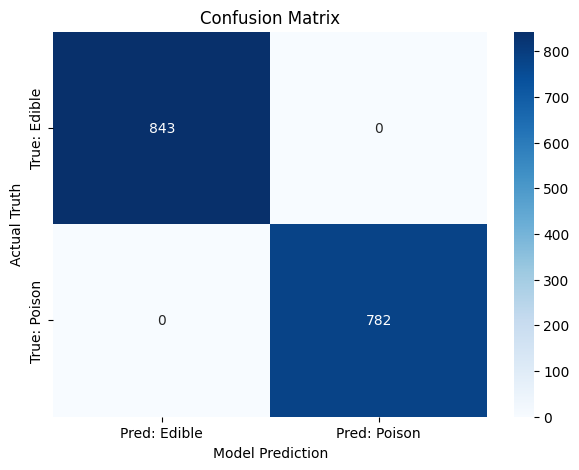

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Edible', 'Pred: Poison'],
            yticklabels=['True: Edible', 'True: Poison'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Truth')
plt.xlabel('Model Prediction')
plt.show()